In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv('3.01. Country clusters.csv')

In [10]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [9]:
data.describe()

,Latitude,Longitude
count,6.000000,6.000000
mean,38.971667,-9.531667
std,32.155820,86.523904
min,-25.450000,-103.770000
25%,45.415000,-73.232500
50%,48.950000,-0.065000
75%,53.295000,8.400000
max,62.400000,133.110000


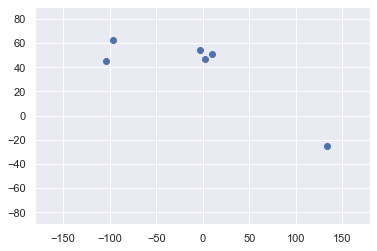

In [7]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [41]:
data_mapped=data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':1,'German':2,'French':3})
x=data_mapped.iloc[:,1:4]

In [42]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,1
1,62.40,-96.80,1
2,46.75,2.40,3
3,54.01,-2.53,1
4,51.15,10.40,2
5,-25.45,133.11,1


In [43]:
Kmeans=KMeans(2)

In [44]:
Kmeans.fit(x)

KMeans(n_clusters=2)

In [45]:
identified_clusters=Kmeans.fit_predict(x)

In [46]:
identified_clusters

array([1, 1, 1, 1, 1, 0])

In [47]:
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_clusters

In [48]:
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


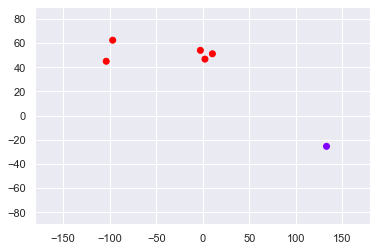

In [49]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [50]:
Kmeans.inertia_

13208.958119999996

In [51]:
wcss=[]

for i in range(1,7):
    Kmeans=KMeans(i)
    Kmeans.fit(x)
    wcss_iter=Kmeans.inertia_
    wcss.append(wcss_iter)

In [52]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 40.50624999999998,
 0.0]

Text(0, 0.5, 'With-in clutser sum of Squares')

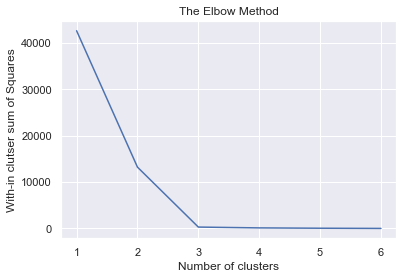

In [53]:
num_cluster=range(1,7)
plt.plot(num_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('With-in clutser sum of Squares')

In [24]:
data_mapped=data.copy()

In [25]:
data_mapped['Language']=data_mapped['Language'].map({'English':1,'German':2,'French':3})

In [26]:
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,1
1,Canada,62.40,-96.80,1
2,France,46.75,2.40,3
3,UK,54.01,-2.53,1
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,1


In [30]:
x=data_mapped[['Language']]

In [31]:
Kmeans.fit(x)

KMeans(n_clusters=2)

In [32]:
identified_clusters=Kmeans.fit_predict(x)

In [33]:
data_with_clusters=data.copy()
data_with_clusters['Cluster']=identified_clusters

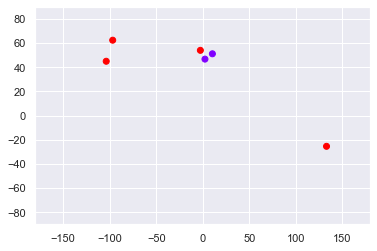

In [34]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [35]:
Kmeans.inertia_

0.5

In [54]:
data=pd.read_csv('3.12. Example.csv')

In [55]:
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Text(0, 0.5, 'Loyalty')

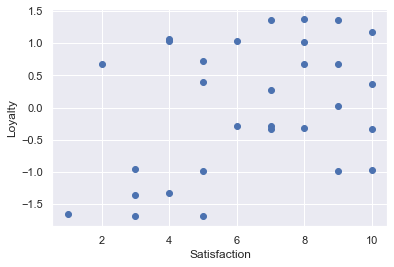

In [56]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [57]:
x=data.copy()

In [58]:
Kmeans=KMeans(2)

In [60]:
Kmeans.fit(x)

KMeans(n_clusters=2)

In [61]:
clusters=x.copy()
clusters['Cluster_pred']=Kmeans.fit_predict(x)

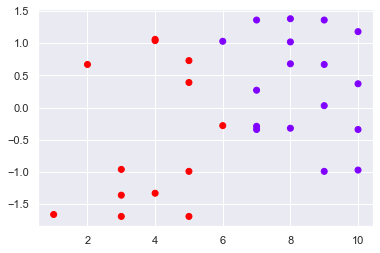

In [62]:
plt.scatter(data=clusters,x='Satisfaction',y='Loyalty',c='Cluster_pred',cmap='rainbow')

In [63]:
from sklearn import preprocessing

In [64]:
x_scaled=preprocessing.scale(x)

In [66]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [68]:
wcss=[]
for i in range(1,10):
    Kmeans=KMeans(i)
    Kmeans.fit(x_scaled)
    wcss.append(Kmeans.inertia_)

Text(0, 0.5, 'WCSS')

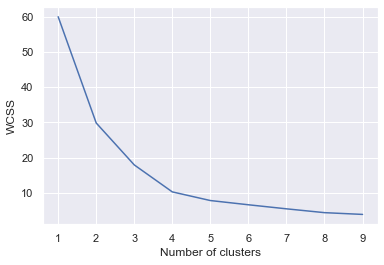

In [69]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [71]:
kmeans_new=KMeans(2)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['Cluster']=kmeans_new.fit_predict(x_scaled)

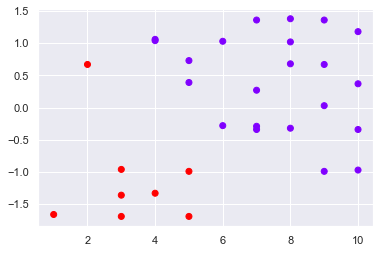

In [72]:
plt.scatter(data=cluster_new,x='Satisfaction',y='Loyalty',c='Cluster',cmap='rainbow')

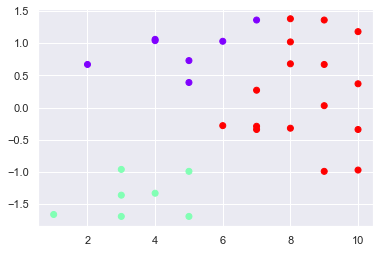

In [74]:
kmeans_new=KMeans(3)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['Cluster']=kmeans_new.fit_predict(x_scaled)
plt.scatter(data=cluster_new,x='Satisfaction',y='Loyalty',c='Cluster',cmap='rainbow')

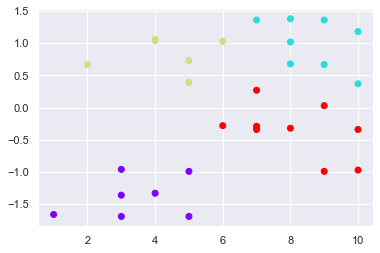

In [75]:
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['Cluster']=kmeans_new.fit_predict(x_scaled)
plt.scatter(data=cluster_new,x='Satisfaction',y='Loyalty',c='Cluster',cmap='rainbow')

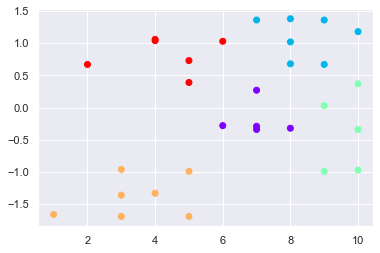

In [76]:
kmeans_new=KMeans(5)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['Cluster']=kmeans_new.fit_predict(x_scaled)
plt.scatter(data=cluster_new,x='Satisfaction',y='Loyalty',c='Cluster',cmap='rainbow')

In [78]:
data=pd.read_csv('Country clusters standardized.csv',index_col='Country')

In [79]:
x_scaled=data.copy()

In [80]:
x_scaled.drop(['Language'],axis=1,inplace=True)

In [81]:
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


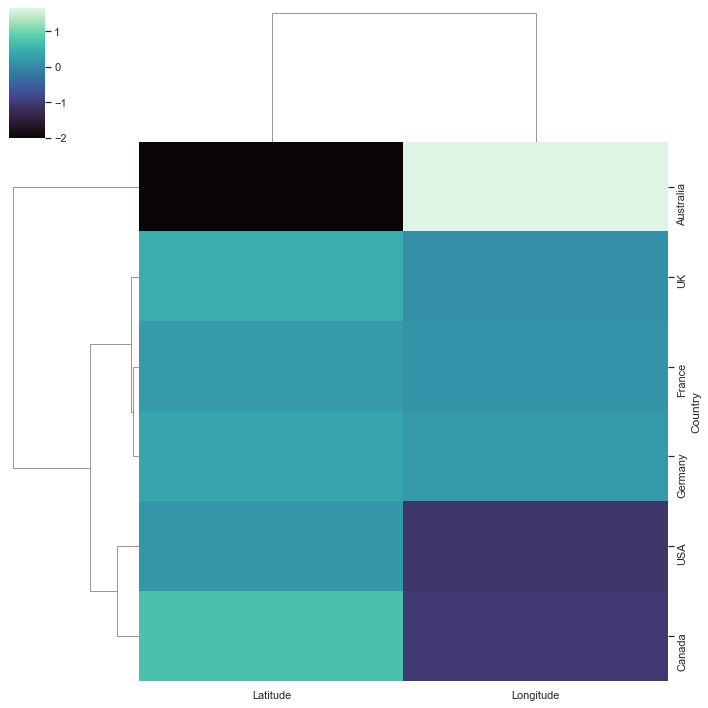

In [83]:
sns.clustermap(x_scaled,cmap='mako')